In [1]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
data = pd.read_csv('SongCSV.csv')

In [245]:
for x in range(0,10000):
    if (str(data[[1]])) == 9600:
        print(data[x])

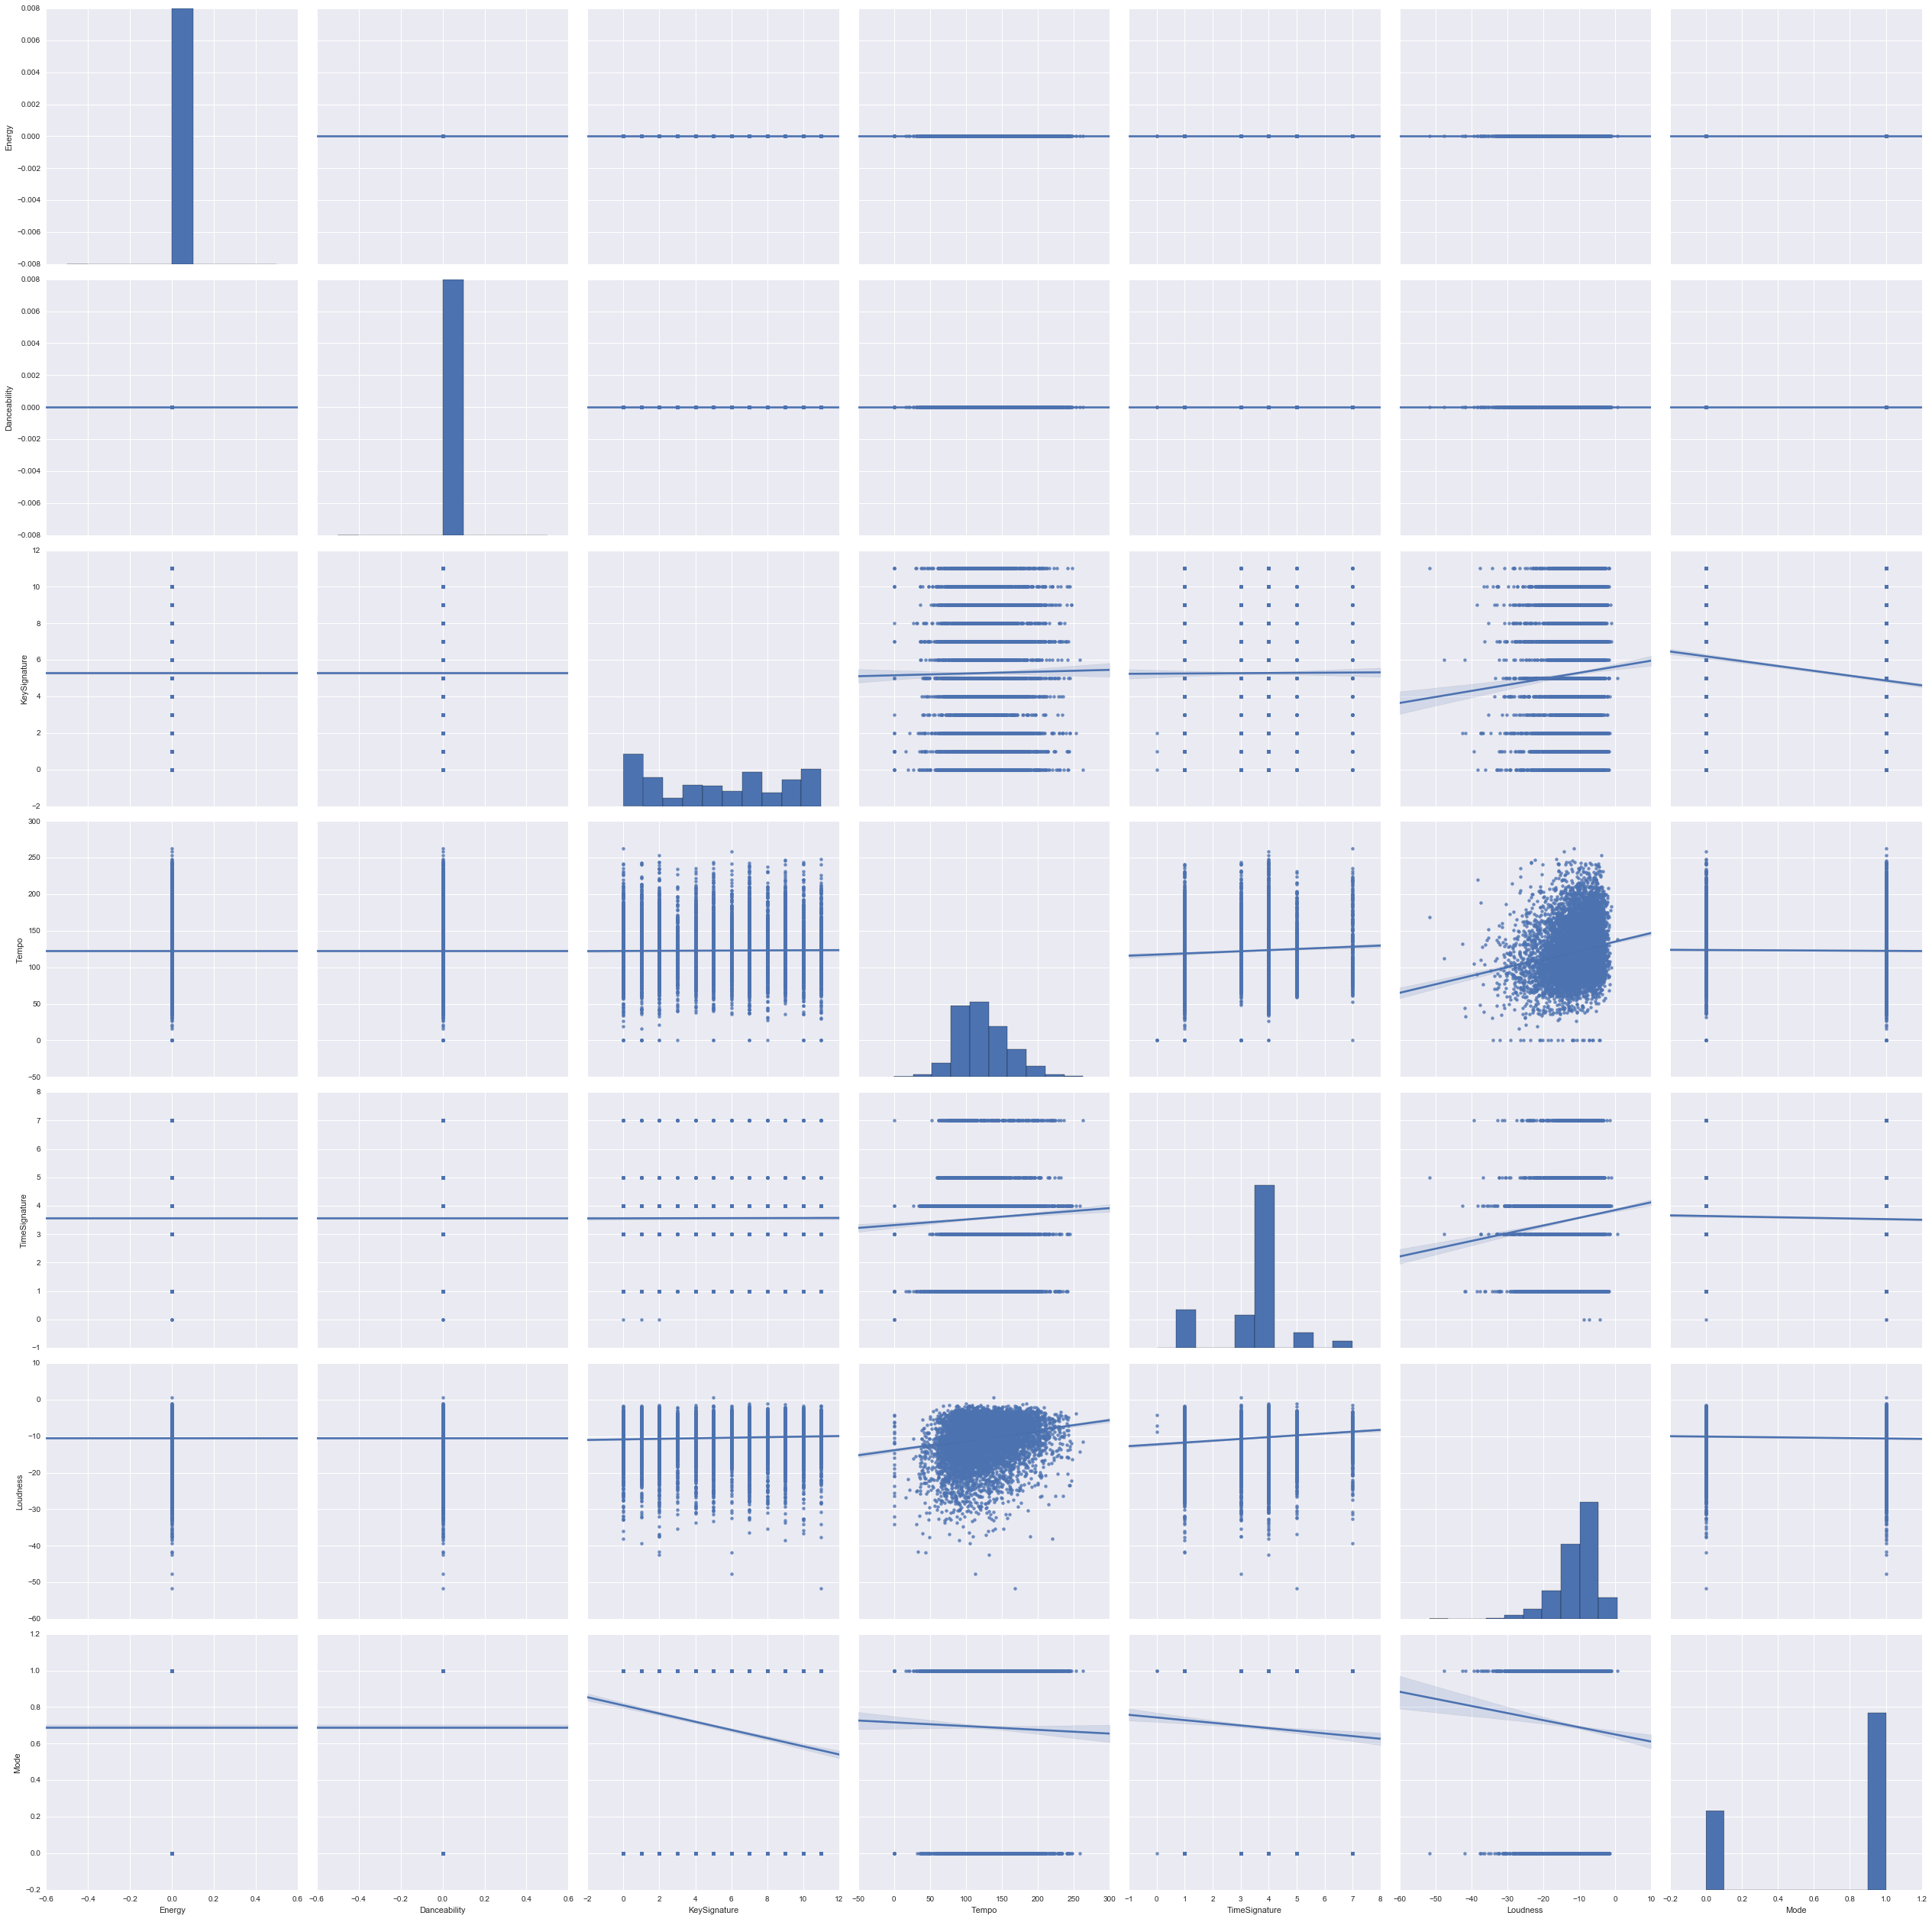

In [3]:
sns.pairplot(data, vars = ['Energy','Danceability','KeySignature','Tempo','TimeSignature','Loudness','Mode'], size=5, kind='reg')

In [2]:
test = data[['KeySignature','Tempo','TimeSignature','Loudness']]
#test = data[['KeySignature','Tempo']]
print(test.head(1))

   KeySignature   Tempo  TimeSignature  Loudness
0             1  92.198              4   -11.197


For n_clusters = 25 The average silhouette_score is : 0.251939489672


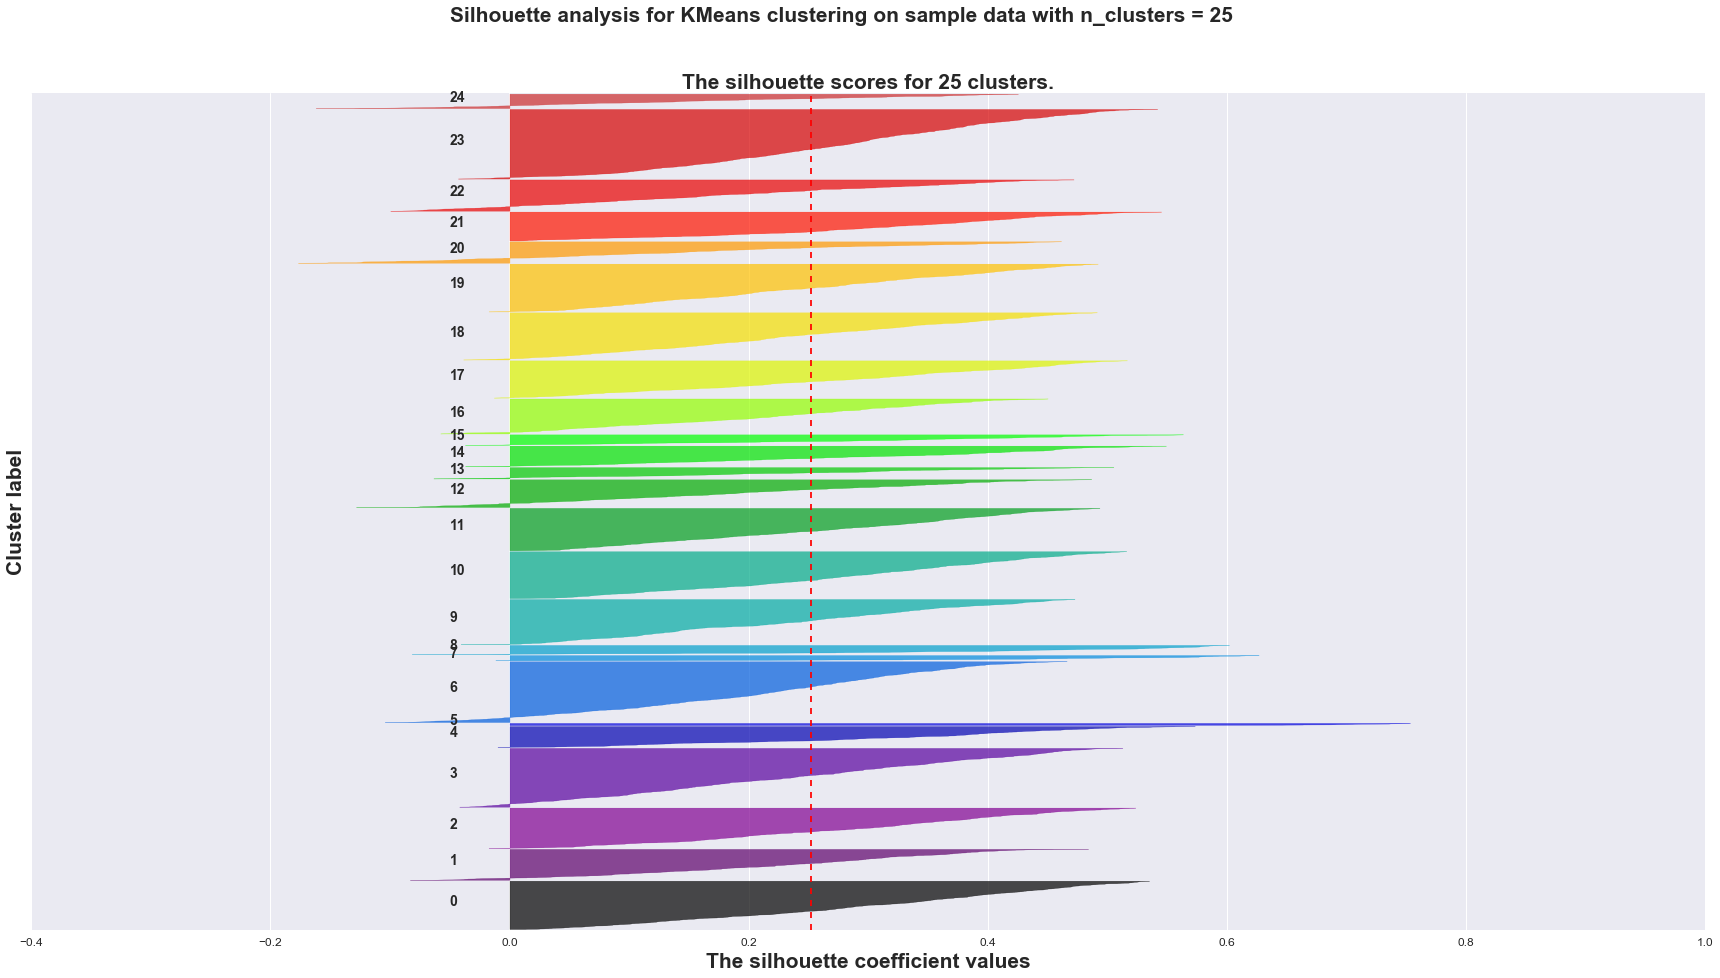

In [3]:
range_n_clusters = [25]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(30, 15)

    
    #First plot visualizes the silhouette scores.
    #Silhouette scores lie between -1,1
    ax1.set_xlim([-.4, 1])
    #The (n_clusters+1)*10 is for inserting blank space between silhouette plots of clusters.
    ax1.set_ylim([0, len(test) + (n_clusters + 1) * 10])

    #Generate the clusterer with n_clusters value and a random
    #Seed of 10 for consistancy.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(test)
    cluster_map = pd.DataFrame()
    cluster_map['SongNumber'] = data[['SongNumber']]
    cluster_map['cluster'] = clusterer.labels_

    #The silhouette_score gives the average value for all the samples.
    #This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(test, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(test, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        #Aggregate the silhouette scores for samples belonging to
        #cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
                 fontsize=14, fontweight='bold')

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(("The silhouette scores for 25 clusters."),
                 fontsize=21, fontweight='bold')
    ax1.set_xlabel(("The silhouette coefficient values"),
                 fontsize=21, fontweight='bold')
    ax1.set_ylabel(("Cluster label"),
                 fontsize=21, fontweight='bold')

    #Addition of a vertical line for the total average silhouette score
    #For n clusters
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.tick_params(axis='x', labelsize=12)

    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    #2nd Plot showing clusters that were formed
    #ax2.scatter(test.values[:,1], test.values[:,3], marker='.', s=30, lw=0, alpha = 0.7, c=colors)

    #Labeling the clusters
    #centers = clusterer.cluster_centers_
    #Draw white circles at cluster centers
    #ax2.scatter(centers[:, 1], centers[:, 3],
     #           marker='o', c="white", alpha=1, s=200)

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[1], c[3], marker='$%d$' % i, alpha=1, s=50)

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Tempo")
    #ax2.set_ylabel("Loudness")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=21, fontweight='bold')

    plt.show()
   

In [ ]:
18,7